In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read the data into a pandas dataframe
df = pd.read_csv("new.csv")



In [43]:
df.columns =['Un','DATE','VALUE']

In [44]:
df = df.drop(['Un'],axis=1)

In [45]:
df

,DATE,VALUE
0,1973-01-01,72.076
1,1973-02-01,64.442
2,1973-03-01,64.084
3,1973-04-01,60.842
4,1973-05-01,61.798
...,...,...
518,2016-03-01,72.840
519,2016-04-01,71.410
520,2016-05-01,82.510
521,2016-06-01,115.772


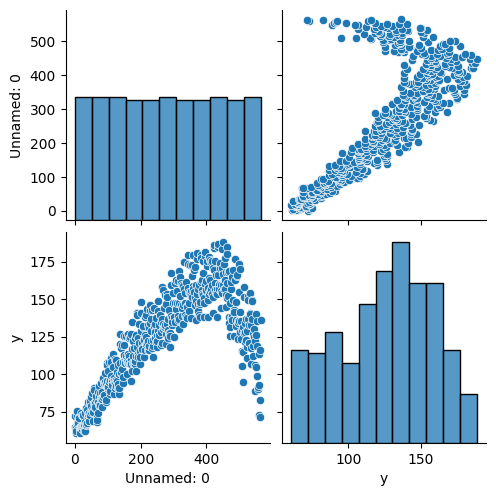

In [12]:
sns.pairplot(df)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2136\1154357803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<AxesSubplot: >

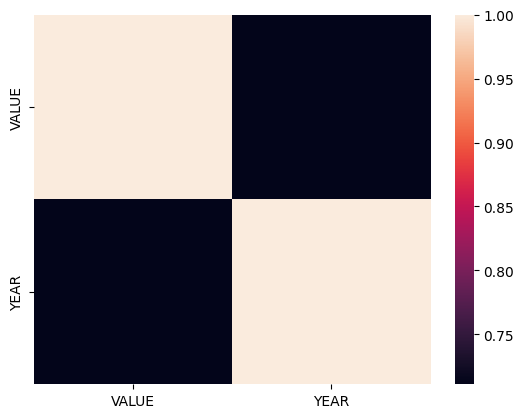

In [166]:
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix)

In [28]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [29]:
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day


In [30]:
df

,DATE,VALUE,YEAR,MONTH,DAY
0,1973-01-01,72.076,1973,1,1
1,1973-02-01,64.442,1973,2,1
2,1973-03-01,64.084,1973,3,1
3,1973-04-01,60.842,1973,4,1
4,1973-05-01,61.798,1973,5,1
...,...,...,...,...,...
518,2016-03-01,72.840,2016,3,1
519,2016-04-01,71.410,2016,4,1
520,2016-05-01,82.510,2016,5,1
521,2016-06-01,115.772,2016,6,1


In [31]:
from sklearn.metrics import r2_score


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["YEAR", "MONTH", "DAY"]], df["VALUE"], test_size=5)

# set up the XGBoost model
model = xgb.XGBRegressor()

# train the model
model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
X_train

,YEAR,MONTH,DAY
229,1992,2,1
311,1998,12,1
150,1985,7,1
518,2016,3,1
452,2010,9,1
...,...,...,...
199,1989,8,1
355,2002,8,1
32,1975,9,1
37,1976,2,1


In [33]:
# evaluate the model
y_pred = model.predict(X_test)
print("Test set R2:", r2_score(y_test, y_pred))



Test set R2: 0.9907178587126506


In [34]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


Mean Absolute Error:  2.229584252929686


In [35]:
y_pred


array([143.6092 , 113.32389, 176.93819, 158.45398, 109.36103],
      dtype=float32)

In [36]:
data = [[2017,10,1], [2018,9,1], [2019,5,1], [2020,4,1],[2021,7,1],[2022,3,1],[2023,8,1],[2024,12,1],[2025,11,1],[2026,11,1]]


In [37]:
# predict next 10 years of co2 emission

next_10_years =  pd.DataFrame(data, columns=['YEAR', 'MONTH','DAY'])


In [38]:
next_10_years

,YEAR,MONTH,DAY
0,2017,10,1
1,2018,9,1
2,2019,5,1
3,2020,4,1
4,2021,7,1
5,2022,3,1
6,2023,8,1
7,2024,12,1
8,2025,11,1
9,2026,11,1


In [39]:
y_pred_next_10_years = model.predict(next_10_years)


In [40]:
y_pred_next_10_years

array([ 92.793396, 112.77181 ,  82.467804,  71.16105 , 135.94429 ,
        73.11307 , 130.04346 ,  86.24945 ,  84.99571 ,  84.99571 ],
      dtype=float32)

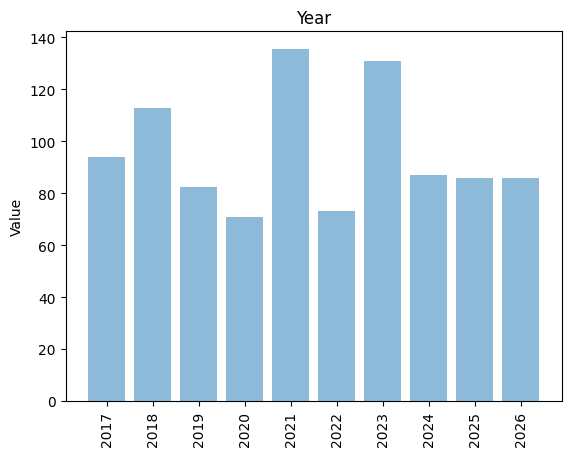

In [167]:
plt.bar(next_10_years.YEAR, y_pred_next_10_years, align='center', alpha=0.5)
plt.ylabel('Value')
labels = ['2017', '2018', '2019', '2020', '2021', '2022','2023', '2024', '2025', '2026']

plt.xticks(next_10_years.YEAR, labels, rotation ='vertical')

plt.title('Year')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


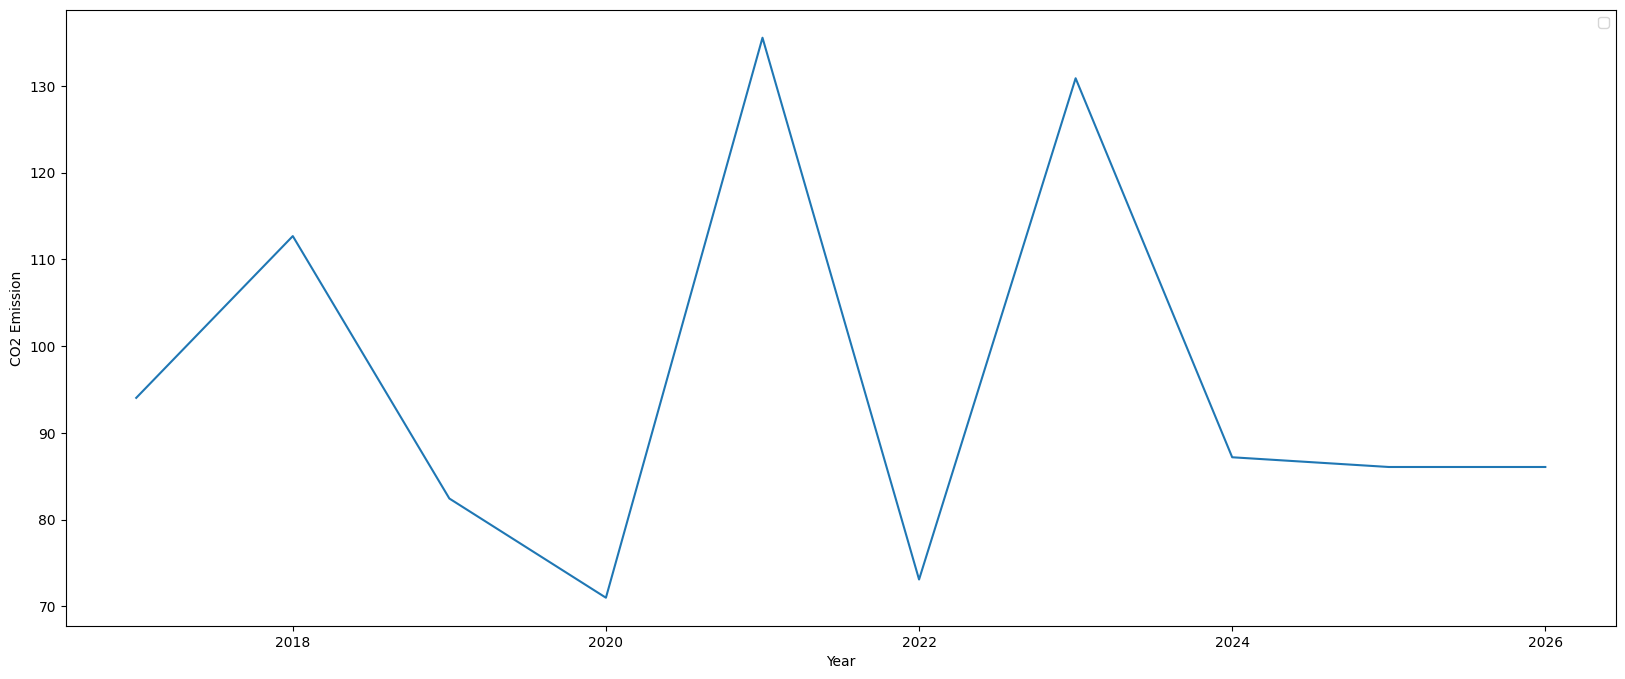

In [158]:
# visualize the prediction
plt.figure(figsize=(20,8))

plt.plot(next_10_years.YEAR, y_pred_next_10_years)
plt.xlabel("Year")
plt.ylabel("CO2 Emission")
plt.legend()
plt.show()